<a href="https://colab.research.google.com/github/rchecnes/PythonIA/blob/main/clasficador_perro_gato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteDI1S1H/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

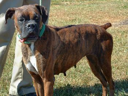
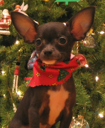
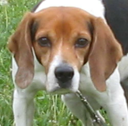
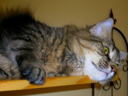
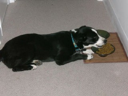

In [5]:
tfds.as_dataframe(datos['train'].take(5),metadatos)

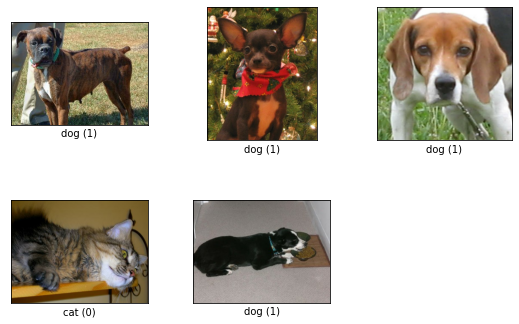

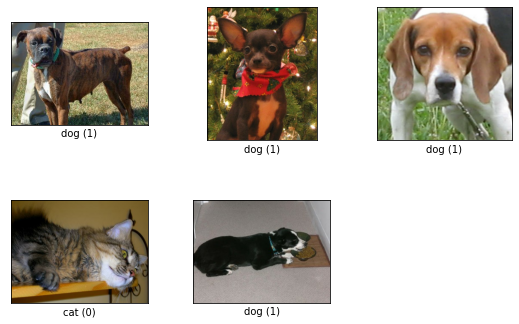

In [6]:
tfds.show_examples(datos['train'].take(5),metadatos)

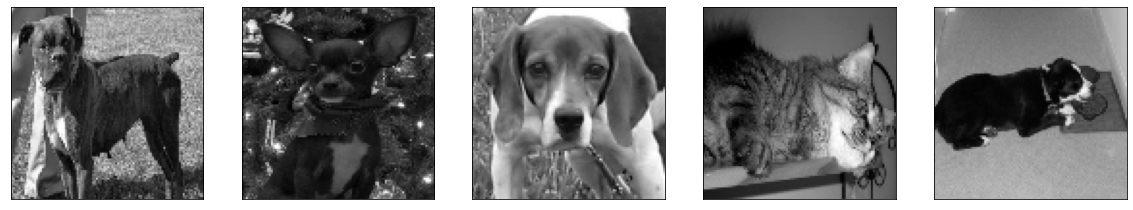

In [21]:
import matplotlib.pyplot as plt
import cv2
plt.figure(figsize=(20,20))
TAMANO_IMG = 100

for i, (imagen, etiqueta)in enumerate(datos['train'].take(5)):
  imagen=cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
  imagen=cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(1,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [22]:
datos_entrenamiento=[]

In [27]:
for i, (imagen, etiqueta)in enumerate(datos['train']): #todos los datos
 imagen = cv2.resize(imagen.numpy(),(TAMANO_IMG,TAMANO_IMG))
 imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
 imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1)#cambiar tamaño a 100, 100, 1
 datos_entrenamiento.append([imagen, etiqueta])

In [29]:
datos_entrenamiento[0]

[array([[[242],
         [190],
         [105],
         ...,
         [189],
         [195],
         [143]],
 
        [[230],
         [130],
         [ 88],
         ...,
         [188],
         [179],
         [187]],
 
        [[170],
         [ 93],
         [ 84],
         ...,
         [131],
         [158],
         [168]],
 
        ...,
 
        [[112],
         [173],
         [164],
         ...,
         [141],
         [152],
         [119]],
 
        [[140],
         [151],
         [172],
         ...,
         [ 96],
         [150],
         [152]],
 
        [[ 92],
         [112],
         [168],
         ...,
         [ 44],
         [ 52],
         [ 47]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [30]:
len(datos_entrenamiento)

23262

In [32]:
x = []#imagen de entrada  (pixeles)
y= []#etiqueta(perro o gato)

for imagen, etiqueta in datos_entrenamiento:
  x.append(imagen)
  y.append(etiqueta)

In [ ]:
x

In [34]:
import numpy as np

x=np.array(x).astype(float)/255

In [ ]:
x

In [ ]:
y

In [37]:
y=np.array(y)

In [1]:
y

NameError: ignored